__1__ К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.


In [76]:
def knn(x_train, y_train, x_test, k):
    answers = []
    for x in x_test:
        test_distances = [(e_metrics(x, x_train[i]), y_train[i]) for i in range(len(x_train))]
        classes = {class_item: 0 for class_item in set(y_train)}
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1/(d[0]+0.01)**2 # не уверен что правильно. 
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

__2__ Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [77]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=1000, random_state=1)

In [78]:
def kmeans(data, k, max_iterations, min_distance):    
    centroids = [data[i] for i in range(k)]
    for _ in range(max_iterations):
        classes = {i: [] for i in range(k)}
        for x in data:
            distances = [e_metrics(x, centroid) for centroid in centroids]
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        old_centroids = centroids.copy()
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                break

        if optimal:
            break
    
    return old_centroids, classes

In [80]:
centroids, clusters = kmeans(X, k, max_iterations, min_distance)

In [87]:
def acc_mse(centroids, classes):
    res = 0
    for i in range(len(centroids)):
        res += sum([e_metrics(x, centroids[i]) for x in classes[i]])/len(classes[i])
    return res

In [88]:
max_iterations = 100
min_distance = 1e-4
k_count = [i for i in range(1,11)]
acc = []
for k in k_count:
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    acc.append(acc_mse(centroids, clusters))

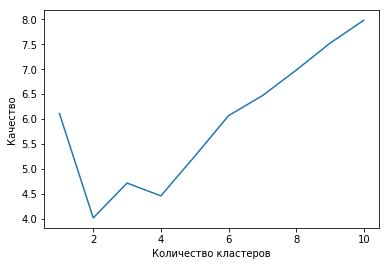

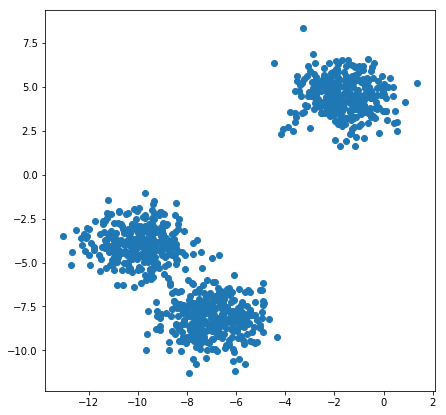

In [99]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(k_count, acc)
plt.xlabel('Количество кластеров')
plt.ylabel('Качество')


plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])
plt.show()


Примечательно, что при трех четко выраженных кластеров, наименьшая ошибка при двух. Настораживает.